# Applying clustering and classification for authorship attributtion on Brazilian corpus
### 📝 Author: [GABRIEL ALBERNAZ '26, Gemini, GitHub Copilot] | 📅 Date: [April 2025] (full project log in README.txt)

#### 📌 Description:
This project replicates the authorship attribution analysis of the Federalist Papers conducted by Jockers and Witten (2010) on the Federalists papers, but extending it to more techniques and using Brazilian written corpus. Using machine learning techniques, including clustering and classification algorithms, the study aims to confirm the authorship of known papers and generate evidence to predict the authorship of test papers. Ultimately, accuracy and efficiency will be compared across all models for analysis
<p></p>


## **Introduction**

Authorship attribution is the process of determining the author of a given text based on its linguistic and stylistic features. By analyzing patterns such as word usage, sentence structure, and vocabulary, computational methods can identify the most likely author of a document.

The Federalist Papers, a collection of 85 essays written in the late 18th century to promote the ratification of the United States Constitution, were authored by Alexander Hamilton, James Madison, and John Jay. While the authorship of most papers is well-established, there are 12 disputed papers and several co-authored ones, which have been the subject of extensive scholarly debate.

Jockers and Witten conducted a comprehensive comparison of machine learning methods for authorship attribution using the Federalist Papers corpus. They evaluated several classifiers—including Support Vector Machines (SVM), k-nearest neighbors, regularized discriminant analysis (RDA), and nearest shrunken centroids (NSC)—across raw and pre-processed word and bigram features. Their findings consistently attributed nearly all disputed papers to Madison, with NSC and RDA achieving the highest accuracy and confidence. Notably, the NSC classifier assigned every disputed and co-authored paper to Madison with exceptionally high probabilities, reinforcing earlier research while also demonstrating the strength of regularized classification techniques in stylometric analysis (Jockers & Witten, 2010).

Building off their work, we will use the works of Machado de Assis and José de Alencar, authors from the Brazilian Romanticism and Realism literary movements, to use our clustering and classifications models, to ultimately compare accuracy and efficiency amongst them.

In this notebook, we will:
- Import and preprocess datasets containing 1-gram and 2-gram word frequencies from the Brazilian authors José de Alencar and Machado de Assis.
- Explore and clean the data by removing unnecessary rows, renaming columns, and checking for null values or duplicates.
- Visualize data distributions and patterns using bar plots, heatmaps, and line plots.
- Perform clustering analysis, including K-means and hierarchical clustering, to group papers based on stylistic similarities.
- Apply dimensionality reduction techniques like PCA to handle high-dimensional data and improve clustering efficiency.
- Train and evaluate classification models (e.g., Decision Trees, SVM, Naive Bayes) to predict authorship of test set papers.
- Use cross-validation to assess model performance and ensure robustness.
- Evaluate performance across different models and contrast processed and unprocessed 1-gram and 2-grams.
- Document findings and insights from clustering and classification analyses.


## **Imports**

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import export_text, plot_tree
from sklearn import svm
from sklearn.metrics import homogeneity_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import joblib


## **Acquiring the Data**

Texts were acquired in txt format [online](https://www.baixelivros.com.br/), then scrubbed in [Lexos](https://lexos.wheatoncollege.edu/) following the following settings:
- All lowercase
- No punctuation
- No digits

After tokenization, the top 100 1grams and 2grams were saved onto csv files, in which each row represents an individual text, and columns represent proportional word frequencies of those that appear in all 13 documents. Then all of the above steps were done, but a list of stopwords were removed. This will be served for comparison and analysis further on.


## **Reading the Data**

After passing the texts through Lexos, 4 different files were created:
- top_100_1grams.csv
- top_100_1grams_NOSTOPWORDS.csv
- top_100_2grams.csv
- top_100_2grams_NOSTOPWORDS.csv

Files are differentiated by either using 1grams or 2grams, and either containing or having stopwords removed 

In [328]:
filename1_1gram = "BR texts/top_100_1grams.csv"
filename2_1gram_NOSTOPWORDS = "BR texts/top_100_1grams_NOSTOPWORDS.csv"
filename3_2gram = "BR texts/top_100_2grams.csv"
filename4_2gram_NOSTOPWORDS = "BR texts/top_100_2grams_NOSTOPWORDS.csv"


# Load the CSV files into Pandas DataFrames
df_1gram = pd.read_csv(filename1_1gram)
df_1gram_NOSTOPWORDS = pd.read_csv(filename2_1gram_NOSTOPWORDS)
df_2gram = pd.read_csv(filename3_2gram)
df_2gram_NOSTOPWORDS = pd.read_csv(filename4_2gram_NOSTOPWORDS)


Let's take a look at one of our dataframes

In [329]:
df_1gram

,Unnamed: 0,a,agora,ainda,alguma,alguns,alma,anos,antes,ao,...,todos,tudo,tão,um,uma,vez,vezes,vida,à,é
0,Total,1.1196,0.0292,0.0525,0.0286,0.0246,0.0447,0.0353,0.0253,0.1689,...,0.0304,0.0437,0.0390,0.4154,0.2810,0.0328,0.0213,0.0382,0.1347,0.2182
1,Average,0.0861,0.0022,0.0040,0.0022,0.0019,0.0034,0.0027,0.0019,0.0130,...,0.0023,0.0034,0.0030,0.0320,0.0216,0.0025,0.0016,0.0029,0.0104,0.0168
2,helena - machado,0.1055,0.0020,0.0039,0.0032,0.0033,0.0016,0.0018,0.0025,0.0135,...,0.0027,0.0030,0.0031,0.0274,0.0181,0.0033,0.0015,0.0028,0.0111,0.0154
3,iracema - jose,0.0965,0.0020,0.0035,0.0003,0.0004,0.0036,0.0003,0.0014,0.0133,...,0.0018,0.0005,0.0017,0.0128,0.0087,0.0017,0.0017,0.0012,0.0123,0.0149
4,Memorias postumas de bras cubas - machado,0.0872,0.0027,0.0032,0.0029,0.0026,0.0007,0.0029,0.0013,0.0134,...,0.0024,0.0035,0.0033,0.0345,0.0232,0.0028,0.0018,0.0041,0.0100,0.0177
5,O Alienista - machado,0.0908,0.0028,0.0038,0.0022,0.0021,0.0018,0.0017,0.0017,0.0182,...,0.0048,0.0034,0.0040,0.0330,0.0179,0.0019,0.0013,0.0009,0.0166,0.0115
6,O emprestimo - machado,0.0658,0.0030,0.0045,0.0030,0.0030,0.0053,0.0030,0.0015,0.0189,...,0.0045,0.0061,0.0030,0.0340,0.0234,0.0023,0.0008,0.0053,0.0076,0.0174
7,o espelho - machado,0.0893,0.0019,0.0013,0.0032,0.0026,0.0148,0.0032,0.0019,0.0077,...,0.0006,0.0071,0.0013,0.0424,0.0270,0.0013,0.0013,0.0026,0.0051,0.0135
8,O gaucho - jose,0.0923,0.0019,0.0039,0.0014,0.0013,0.0023,0.0013,0.0020,0.0154,...,0.0017,0.0011,0.0025,0.0309,0.0197,0.0031,0.0018,0.0011,0.0110,0.0092
9,senhora - jose,0.0930,0.0018,0.0048,0.0016,0.0007,0.0025,0.0009,0.0024,0.0139,...,0.0020,0.0016,0.0028,0.0281,0.0219,0.0027,0.0016,0.0022,0.0137,0.0119


We can see each paper compose a row and is labeled by title and its author, while columns show frequencies of words. At the first 2 rows, we have total and average frequencies.

Let's quickly inspect the dataframes

In [330]:
# Inspect the data
print("1-Gram DataFrame (With Stopwords):")
print(df_1gram.info())

print("\n1-Gram DataFrame (No Stopwords):")
print(df_1gram_NOSTOPWORDS.info())

print("\n2-Gram DataFrame (With Stopwords):")
print(df_2gram.info())

print("\n2-Gram DataFrame (No Stopwords):")
print(df_2gram_NOSTOPWORDS.info())

1-Gram DataFrame (With Stopwords):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Columns: 101 entries, Unnamed: 0 to é
dtypes: float64(100), object(1)
memory usage: 12.0+ KB
None

1-Gram DataFrame (No Stopwords):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Columns: 101 entries, Unnamed: 0 to é
dtypes: float64(100), object(1)
memory usage: 12.0+ KB
None

2-Gram DataFrame (With Stopwords):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15 non-null     object 
 1   a alma      15 non-null     float64
 2   a cabeça    15 non-null     float64
 3   a um        15 non-null     float64
 4   a vida      15 non-null     float64
 5   com a       15 non-null     float64
 6   com as      15 non-null     float64
 7   com o       15 non-null     float64
 8   com os      15 non-null     float64
 9   

We can also determine that for our practices, we will not need the "Total" and "Average" rows, so we will go ahead and remove them 

In [331]:
df_1gram = df_1gram[~df_1gram['Unnamed: 0'].str.contains('Total|Average', na=False)]
df_1gram_NOSTOPWORDS = df_1gram_NOSTOPWORDS[~df_1gram_NOSTOPWORDS['Unnamed: 0'].str.contains('Total|Average', na=False)]
df_2gram = df_2gram[~df_2gram['Unnamed: 0'].str.contains('Total|Average', na=False)]
df_2gram_NOSTOPWORDS = df_2gram_NOSTOPWORDS[~df_2gram_NOSTOPWORDS['Unnamed: 0'].str.contains('Total|Average', na=False)]

Let's now rename the first column to "Paper_ID", and add a "Author" column

In [332]:
# Rename columns and extract the "Author" column for df_1gram
df_1gram = df_1gram.copy()  # Ensure you're working on a copy
df_1gram.rename(columns={'Unnamed: 0': 'Paper_ID'}, inplace=True)
df_1gram.loc[:, "Author"] = df_1gram["Paper_ID"].str.extract(r'_(\w)$')
df_1gram.insert(1, "Author", df_1gram.pop("Author"))

# Rename columns and extract the "Author" column for df_1gram_NOSTOPWORDS
df_1gram_NOSTOPWORDS = df_1gram_NOSTOPWORDS.copy()
df_1gram_NOSTOPWORDS.rename(columns={'Unnamed: 0': 'Paper_ID'}, inplace=True)
df_1gram_NOSTOPWORDS.loc[:, "Author"] = df_1gram_NOSTOPWORDS["Paper_ID"].str.extract(r'_(\w)$')
df_1gram_NOSTOPWORDS.insert(1, "Author", df_1gram_NOSTOPWORDS.pop("Author"))

# Rename columns and extract the "Author" column for df_2gram
df_2gram = df_2gram.copy()
df_2gram.rename(columns={'Unnamed: 0': 'Paper_ID'}, inplace=True)
df_2gram.loc[:, "Author"] = df_2gram["Paper_ID"].str.extract(r'_(\w)$')
df_2gram.insert(1, "Author", df_2gram.pop("Author"))

# Rename columns and extract the "Author" column for df_2gram_NOSTOPWORDS
df_2gram_NOSTOPWORDS = df_2gram_NOSTOPWORDS.copy()
df_2gram_NOSTOPWORDS.rename(columns={'Unnamed: 0': 'Paper_ID'}, inplace=True)
df_2gram_NOSTOPWORDS.loc[:, "Author"] = df_2gram_NOSTOPWORDS["Paper_ID"].str.extract(r'_(\w)$')
df_2gram_NOSTOPWORDS.insert(1, "Author", df_2gram_NOSTOPWORDS.pop("Author"))


In [333]:

# Update the "Author" column based on the "Paper_ID" content
df_1gram.loc[df_1gram["Paper_ID"].str.contains("machado", na=False), "Author"] = "M"
df_1gram.loc[df_1gram["Paper_ID"].str.contains("jose", na=False), "Author"] = "J"

df_1gram_NOSTOPWORDS.loc[df_1gram_NOSTOPWORDS["Paper_ID"].str.contains("machado", na=False), "Author"] = "M"
df_1gram_NOSTOPWORDS.loc[df_1gram_NOSTOPWORDS["Paper_ID"].str.contains("jose", na=False), "Author"] = "J"

df_2gram.loc[df_2gram["Paper_ID"].str.contains("machado", na=False), "Author"] = "M"
df_2gram.loc[df_2gram["Paper_ID"].str.contains("jose", na=False), "Author"] = "J"

df_2gram_NOSTOPWORDS.loc[df_2gram_NOSTOPWORDS["Paper_ID"].str.contains("machado", na=False), "Author"] = "M"
df_2gram_NOSTOPWORDS.loc[df_2gram_NOSTOPWORDS["Paper_ID"].str.contains("jose", na=False), "Author"] = "J"

In [334]:
df_2gram

,Paper_ID,Author,a alma,a cabeça,a um,a vida,com a,com as,com o,com os,...,que se,que é,se a,toda a,todo o,todos os,um homem,é a,é o,é que
2,helena - machado,M,0.0079,0.0112,0.0103,0.0087,0.0344,0.0079,0.0257,0.0132,...,0.0261,0.0195,0.0066,0.0120,0.0108,0.0124,0.0083,0.0174,0.0120,0.0132
3,iracema - jose,J,0.0090,0.0103,0.0039,0.0052,0.0323,0.0129,0.0439,0.0181,...,0.0400,0.0077,0.0077,0.0090,0.0090,0.0129,0.0013,0.0323,0.0529,0.0039
4,Memorias postumas de bras cubas - machado,M,0.0018,0.0088,0.0147,0.0125,0.0320,0.0088,0.0253,0.0184,...,0.0272,0.0239,0.0073,0.0084,0.0051,0.0140,0.0107,0.0143,0.0136,0.0327
5,O Alienista - machado,M,0.0077,0.0046,0.0230,0.0031,0.0292,0.0046,0.0323,0.0123,...,0.0246,0.0154,0.0061,0.0246,0.0061,0.0338,0.0138,0.0108,0.0123,0.0276
6,O emprestimo - machado,M,0.0338,0.0068,0.0203,0.0135,0.0405,0.0068,0.0270,0.0270,...,0.0338,0.0068,0.0068,0.0068,0.0068,0.0338,0.0135,0.0068,0.0068,0.0608
7,o espelho - machado,M,0.0802,0.0062,0.0062,0.0185,0.0247,0.0062,0.0309,0.0247,...,0.0309,0.0062,0.0062,0.0247,0.0062,0.0062,0.0123,0.0185,0.0062,0.0247
8,O gaucho - jose,J,0.0116,0.0129,0.0104,0.0033,0.0562,0.0100,0.0520,0.0183,...,0.0474,0.0150,0.0042,0.0112,0.0067,0.0104,0.0125,0.0083,0.0116,0.0067
9,senhora - jose,J,0.0060,0.0113,0.0091,0.0056,0.0421,0.0104,0.0386,0.0126,...,0.0584,0.0129,0.0038,0.0100,0.0110,0.0129,0.0066,0.0082,0.0097,0.0091
10,teoria do medalhao - machado,M,0.0079,0.0079,0.0159,0.0159,0.0317,0.0079,0.0159,0.0079,...,0.0159,0.0317,0.0079,0.0238,0.0159,0.0079,0.0079,0.0397,0.0238,0.0238
11,a_viuvinha - jose,J,0.0071,0.0202,0.0166,0.0071,0.0237,0.0047,0.0154,0.0130,...,0.0747,0.0059,0.0036,0.0237,0.0119,0.0130,0.0214,0.0083,0.0083,0.0024


#### **Shape of the Data**

Let's take a look at the dimensions of both dataframes

In [335]:
# Retrieve and print the shape of the dataframes
shape = df_1gram.shape
print(shape)
shape = df_2gram.shape
print(shape)

(13, 102)
(13, 51)


Check out the data types

In [336]:
df_1gram.dtypes
df_2gram.dtypes

Paper_ID      object
Author        object
a alma       float64
a cabeça     float64
a um         float64
a vida       float64
com a        float64
com as       float64
com o        float64
com os       float64
com um       float64
como um      float64
de que       float64
de um        float64
de uma       float64
do que       float64
e a          float64
e de         float64
e não        float64
e o          float64
e os         float64
e que        float64
em que       float64
há de        float64
mas não      float64
não me       float64
não é        float64
o mesmo      float64
o meu        float64
o que        float64
os olhos     float64
os outros    float64
pode ser     float64
por que      float64
que a        float64
que as       float64
que lhe      float64
que me       float64
que não      float64
que o        float64
que os       float64
que se       float64
que é        float64
se a         float64
toda a       float64
todo o       float64
todos os     float64
um homem     

Now let's see how many papers belong to each author

In [337]:
# Count papers by each author
machado_count = (df_1gram['Author'] == 'M').sum()
jose_count = (df_1gram['Author'] == 'J').sum()

# Print the counts
print(f"Machado Papers: {machado_count}")
print(f"José Papers: {jose_count}")

# Data for the number of papers written by each author
authors = ['Machado', 'José']
counts = [machado_count, jose_count]


Machado Papers: 7
José Papers: 6


## **Data Exploration and Refinement**
The provided datasets require thorough exploration to understand their structure, identify potential issues, and ensure they are suitable for analysis. Key steps include:

- **Exploration**: Examine the datasets for dimensions, data types, and summary statistics to gain insights into their content and distribution.
- **Checking**: Identify and address missing values, duplicate rows, and outliers that could impact the analysis.
- **Refinement**: Transform and preprocess the data as needed, including normalization, feature selection, and handling of zero or near-zero variance features.


### **Cleaning Data**

##### Checking for null data

In [338]:
# Check for null values in all dataframes and print the results
dataframes = {
    "1-Gram": df_1gram,
    "1-Gram (No Stopwords)": df_1gram_NOSTOPWORDS,
    "2-Gram": df_2gram,
    "2-Gram (No Stopwords)": df_2gram_NOSTOPWORDS
}

for name, df in dataframes.items():
    print(f"Null values in {name}:")
    print(df.isnull().sum())
    print()

Null values in 1-Gram:
Paper_ID    0
Author      0
a           0
agora       0
ainda       0
           ..
vez         0
vezes       0
vida        0
à           0
é           0
Length: 102, dtype: int64

Null values in 1-Gram (No Stopwords):
Paper_ID    0
Author      0
agora       0
ainda       0
algum       0
           ..
vez         0
vezes       0
vida        0
à           0
é           0
Length: 102, dtype: int64

Null values in 2-Gram:
Paper_ID     0
Author       0
a alma       0
a cabeça     0
a um         0
a vida       0
com a        0
com as       0
com o        0
com os       0
com um       0
como um      0
de que       0
de um        0
de uma       0
do que       0
e a          0
e de         0
e não        0
e o          0
e os         0
e que        0
em que       0
há de        0
mas não      0
não me       0
não é        0
o mesmo      0
o meu        0
o que        0
os olhos     0
os outros    0
pode ser     0
por que      0
que a        0
que as       0
que lhe      0

##### Checking for duplicates

In [339]:
duplicate_rows_1gram = df_1gram.duplicated()
duplicate_rows_1gram_NOSTOPWORDS = df_1gram_NOSTOPWORDS.duplicated()
duplicate_rows_2gram = df_2gram.duplicated()
duplicate_rows_2gram_NOSTOPWORDS = df_2gram_NOSTOPWORDS.duplicated()

print(f"Number of duplicate rows in 1-gram: {duplicate_rows_1gram.sum()}")
print(f"Number of duplicate rows in 1-gram (No Stopwords): {duplicate_rows_1gram_NOSTOPWORDS.sum()}")
print(f"Number of duplicate rows in 2-gram: {duplicate_rows_2gram.sum()}")
print(f"Number of duplicate rows in 2-gram (No Stopwords): {duplicate_rows_2gram_NOSTOPWORDS.sum()}")

Number of duplicate rows in 1-gram: 0
Number of duplicate rows in 1-gram (No Stopwords): 0
Number of duplicate rows in 2-gram: 0
Number of duplicate rows in 2-gram (No Stopwords): 0


#### End of Data cleaning

No duplicate rows or null data points were found! We don't need to remove anything, so let's keep moving

### **Visualizing the Data**

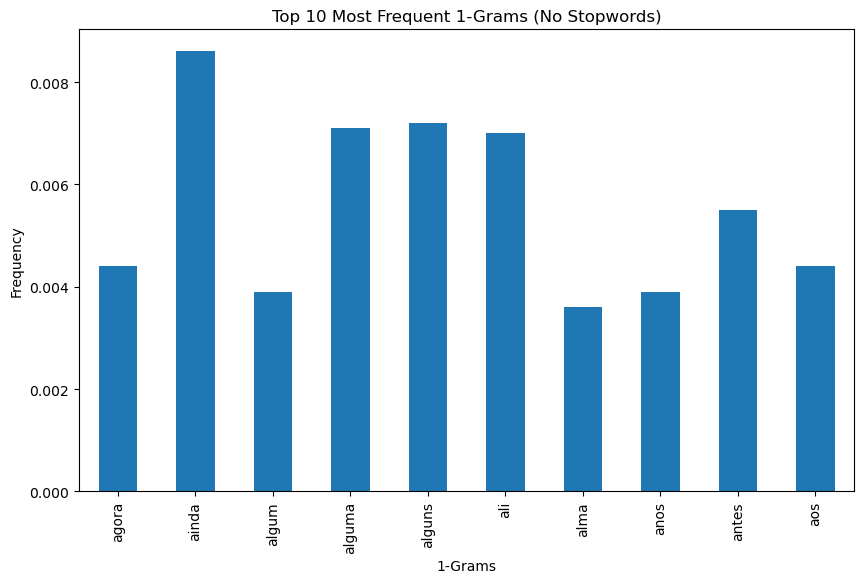

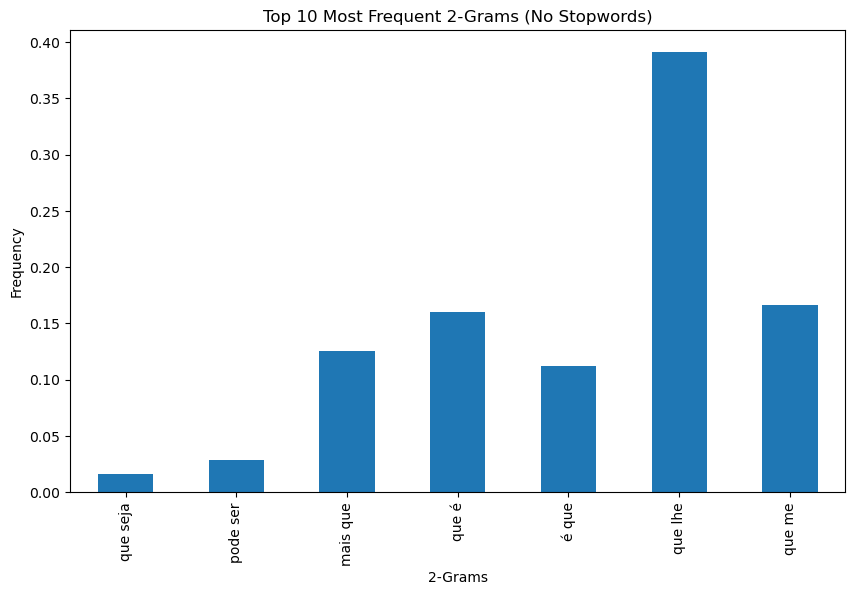

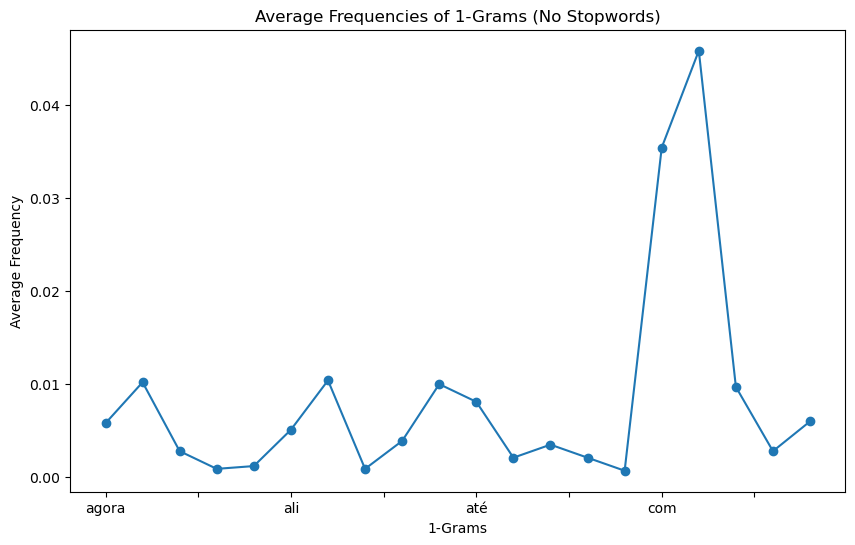

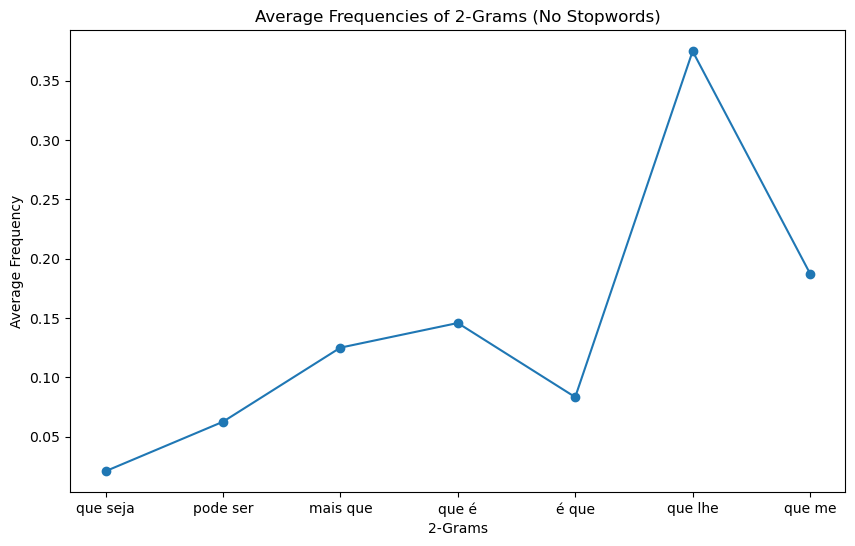

In [340]:
# Visualize the data using three different graphs for the updated dataframes

# Bar plot for the top 10 most frequent 1-grams (No Stopwords)
top_10_1gram_NOSTOPWORDS = df_1gram_NOSTOPWORDS.iloc[0, 2:12]
top_10_1gram_NOSTOPWORDS.plot(kind='bar', figsize=(10, 6), title='Top 10 Most Frequent 1-Grams (No Stopwords)')
plt.xlabel('1-Grams')
plt.ylabel('Frequency')
plt.show()

# Bar plot for the top 10 most frequent 2-grams (No Stopwords)
top_10_2gram_NOSTOPWORDS = df_2gram_NOSTOPWORDS.iloc[0, 2:12]
top_10_2gram_NOSTOPWORDS.plot(kind='bar', figsize=(10, 6), title='Top 10 Most Frequent 2-Grams (No Stopwords)')
plt.xlabel('2-Grams')
plt.ylabel('Frequency')
plt.show()

# Line plot for the average frequencies of 1-grams (No Stopwords)
average_1gram_NOSTOPWORDS = df_1gram_NOSTOPWORDS.iloc[1, 2:22]  # Assuming the second row contains average frequencies
average_1gram_NOSTOPWORDS.plot(kind='line', figsize=(10, 6), marker='o', title='Average Frequencies of 1-Grams (No Stopwords)')
plt.xlabel('1-Grams')
plt.ylabel('Average Frequency')
plt.show()

# Line plot for the average frequencies of 2-grams (No Stopwords)
average_2gram_NOSTOPWORDS = df_2gram_NOSTOPWORDS.iloc[1, 2:22]  # Assuming the second row contains average frequencies
average_2gram_NOSTOPWORDS.plot(kind='line', figsize=(10, 6), marker='o', title='Average Frequencies of 2-Grams (No Stopwords)')
plt.xlabel('2-Grams')
plt.ylabel('Average Frequency')
plt.show()

## **Cluster Analysis**

### Clustering known author's papers

For general pattern seeking to group points based on similarity, to deal with the high dimensionality of the data, and for a 2D visualization of our data, we will perform first a K-means clustering. More on the topic [here](https://www.geeksforgeeks.org/k-means-clustering-introduction/)

We want to perform PCA soon, but first we need to normalize our data

In [341]:
# Normalize the 1-gram dataset
scaler_1gram = StandardScaler()
X_normalized_1gram = scaler_1gram.fit_transform(df_1gram.iloc[:,2:].select_dtypes(include=[np.number]))

# Normalize the 1-gram dataset (No Stopwords)
scaler_1gram_NOSTOPWORDS = StandardScaler()
X_normalized_1gram_NOSTOPWORDS = scaler_1gram_NOSTOPWORDS.fit_transform(df_1gram_NOSTOPWORDS.iloc[:, 2:].select_dtypes(include=[np.number]))

# Normalize the 2-gram dataset
scaler_2gram = StandardScaler()
X_normalized_2gram = scaler_2gram.fit_transform(df_2gram.iloc[:, 2:].select_dtypes(include=[np.number]))

# Normalize the 2-gram dataset (No Stopwords)
scaler_2gram_NOSTOPWORDS = StandardScaler()
X_normalized_2gram_NOSTOPWORDS = scaler_2gram_NOSTOPWORDS.fit_transform(df_2gram_NOSTOPWORDS.iloc[:, 2:].select_dtypes(include=[np.number]))

Principal Component Analysis (PCA) is necessary at this step to reduce the high dimensionality of the dataset, which contains thousands of features. By projecting the data onto a lower-dimensional space, PCA helps to capture the most significant patterns and variations in the data while discarding noise and redundant information. This dimensionality reduction is crucial for visualizing the data in two dimensions and for improving the efficiency and interpretability of subsequent clustering and classification tasks. More on the topic [here](https://www.geeksforgeeks.org/principal-component-analysis-pca/)

In [342]:
# Performing PCA for df_1gram
pca_1gram = PCA(n_components=2)
X_numeric_1gram = df_1gram.select_dtypes(include=[np.number])
X_pca_1gram = pca_1gram.fit_transform(X_numeric_1gram)

# Performing PCA for df_1gram_NOSTOPWORDS
pca_1gram_NOSTOPWORDS = PCA(n_components=2)
X_numeric_1gram_NOSTOPWORDS = df_1gram_NOSTOPWORDS.select_dtypes(include=[np.number])
X_pca_1gram_NOSTOPWORDS = pca_1gram_NOSTOPWORDS.fit_transform(X_numeric_1gram_NOSTOPWORDS)

# Performing PCA for df_2gram
pca_2gram = PCA(n_components=2)
X_numeric_2gram = df_2gram.select_dtypes(include=[np.number])
X_pca_2gram = pca_2gram.fit_transform(X_numeric_2gram)

# Performing PCA for df_2gram_NOSTOPWORDS
pca_2gram_NOSTOPWORDS = PCA(n_components=2)
X_numeric_2gram_NOSTOPWORDS = df_2gram_NOSTOPWORDS.select_dtypes(include=[np.number])
X_pca_2gram_NOSTOPWORDS = pca_2gram_NOSTOPWORDS.fit_transform(X_numeric_2gram_NOSTOPWORDS)

Now we can do K-means clustering

c:\Users\gabal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


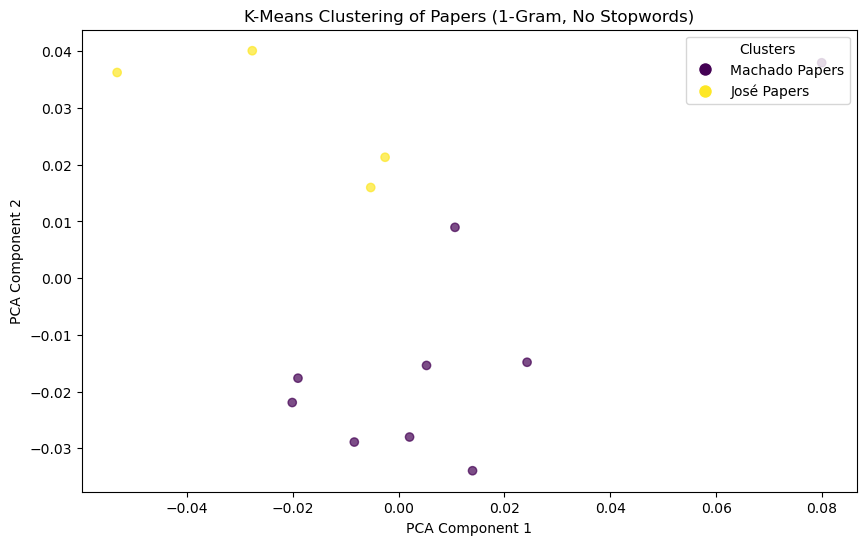

c:\Users\gabal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


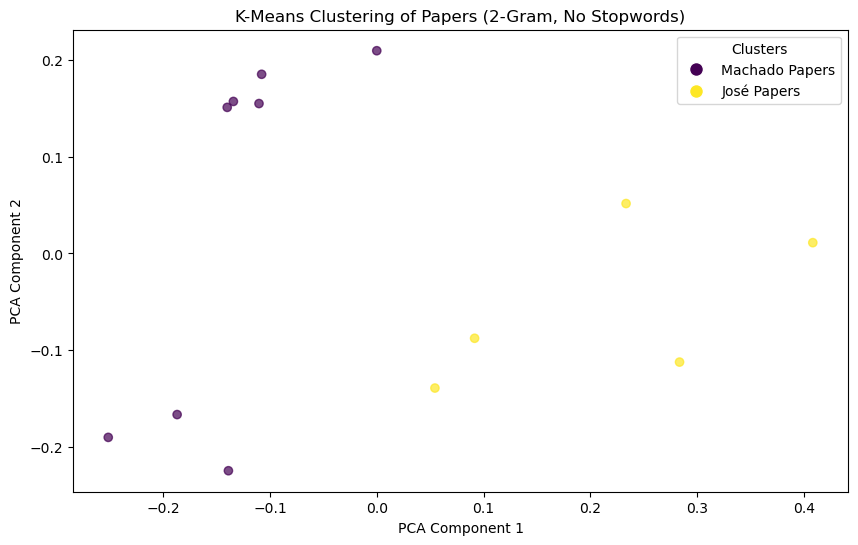

In [343]:
# Perform K-Means clustering on 1-gram (No Stopwords)
kmeans_1gram_NOSTOPWORDS = KMeans(n_clusters=2, random_state=42)  # 2 clusters for 2 authors
clusters_1gram_NOSTOPWORDS = kmeans_1gram_NOSTOPWORDS.fit_predict(X_pca_1gram_NOSTOPWORDS)

# Define cluster labels
cluster_labels_1gram_NOSTOPWORDS = {
    0: "Machado Papers",
    1: "José Papers"
}

# Create the scatter plot for 1-gram (No Stopwords)
plt.figure(figsize=(10, 6))
scatter_1gram_NOSTOPWORDS = plt.scatter(X_pca_1gram_NOSTOPWORDS[:, 0], X_pca_1gram_NOSTOPWORDS[:, 1], 
                                        c=clusters_1gram_NOSTOPWORDS, cmap='viridis', alpha=0.7)

# Add a legend
handles_1gram_NOSTOPWORDS = [plt.Line2D([0], [0], marker='o', color='w', 
                                        markerfacecolor=scatter_1gram_NOSTOPWORDS.cmap(scatter_1gram_NOSTOPWORDS.norm(i)), 
                                        markersize=10) for i in range(len(cluster_labels_1gram_NOSTOPWORDS))]
plt.legend(handles_1gram_NOSTOPWORDS, cluster_labels_1gram_NOSTOPWORDS.values(), title="Clusters", loc="upper right")

# Add titles and labels
plt.title('K-Means Clustering of Papers (1-Gram, No Stopwords)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Repeat the same process for 2-gram (No Stopwords)
kmeans_2gram_NOSTOPWORDS = KMeans(n_clusters=2, random_state=42)  # 2 clusters for 2 authors
clusters_2gram_NOSTOPWORDS = kmeans_2gram_NOSTOPWORDS.fit_predict(X_pca_2gram_NOSTOPWORDS)

# Define cluster labels
cluster_labels_2gram_NOSTOPWORDS = {
    0: "Machado Papers",
    1: "José Papers"
}

# Create the scatter plot for 2-gram (No Stopwords)
plt.figure(figsize=(10, 6))
scatter_2gram_NOSTOPWORDS = plt.scatter(X_pca_2gram_NOSTOPWORDS[:, 0], X_pca_2gram_NOSTOPWORDS[:, 1], 
                                        c=clusters_2gram_NOSTOPWORDS, cmap='viridis', alpha=0.7)

# Add a legend
handles_2gram_NOSTOPWORDS = [plt.Line2D([0], [0], marker='o', color='w', 
                                        markerfacecolor=scatter_2gram_NOSTOPWORDS.cmap(scatter_2gram_NOSTOPWORDS.norm(i)), 
                                        markersize=10) for i in range(len(cluster_labels_2gram_NOSTOPWORDS))]
plt.legend(handles_2gram_NOSTOPWORDS, cluster_labels_2gram_NOSTOPWORDS.values(), title="Clusters", loc="upper right")

# Add titles and labels
plt.title('K-Means Clustering of Papers (2-Gram, No Stopwords)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

We can clearly the clusters well separated, indicating the stylistic differences of each author, demonstrating that our clustering is well aligined with the known authorship of the papers

## Clustering the data

### Performing hierachical clustering and displaying it as a dendogram

We need to decide on our linkage method and accompanying metric for the hierarchical clustering. Since we are working with continuous data, and to minimize our variance within clusters, we will use **Ward's Method** as our linkage method. Ward's Method is specifically designated to work with **Euclidean distance** as its distance metric, as it minimizes the variance within clusters, which is inherently tied ot the squared Euclidean distance. More on Ward's Method [here](https://en.wikipedia.org/wiki/Ward%27s_method)

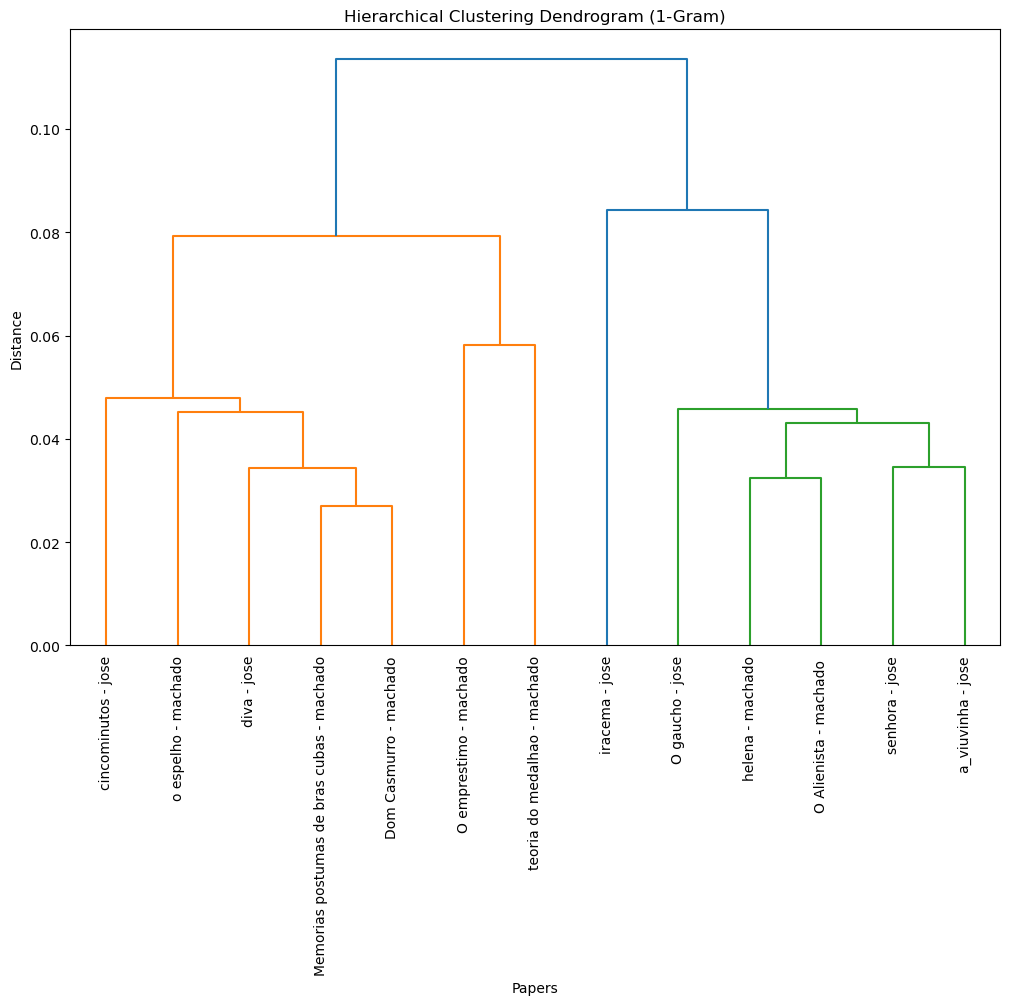

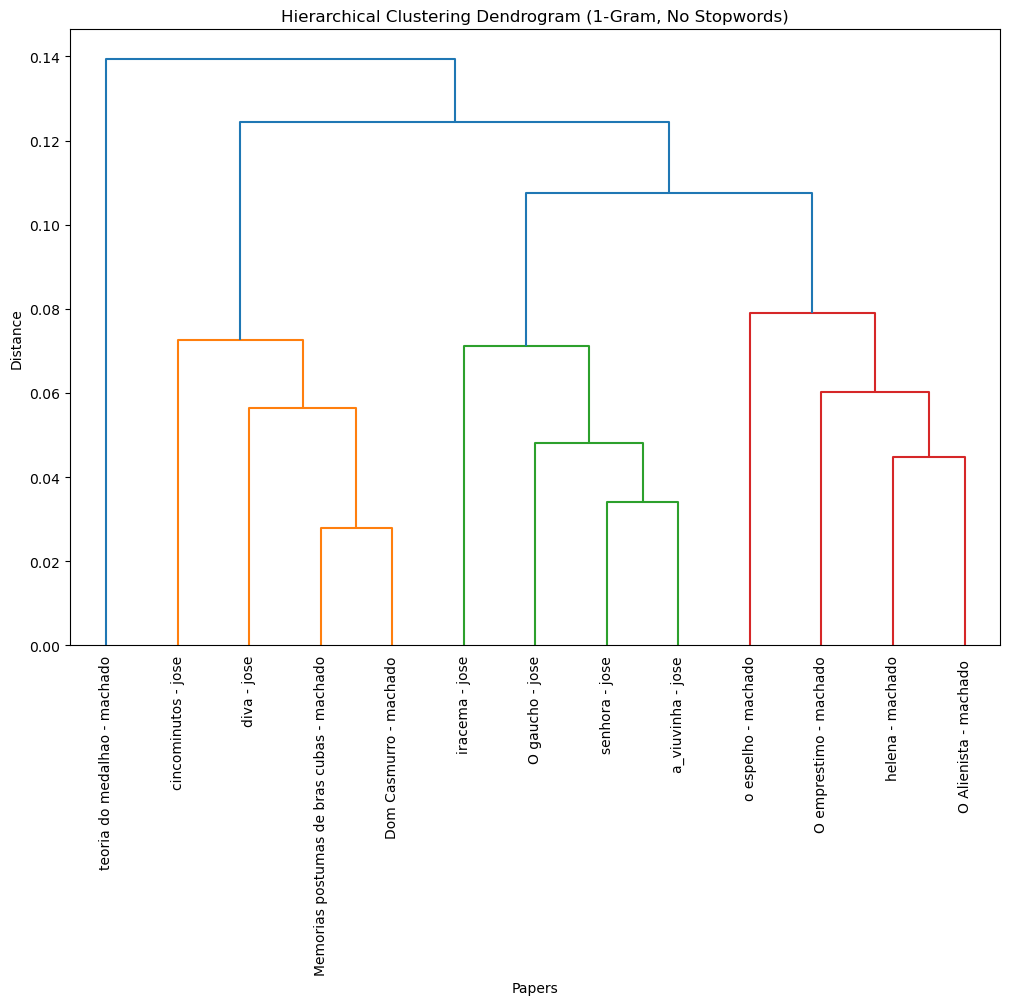

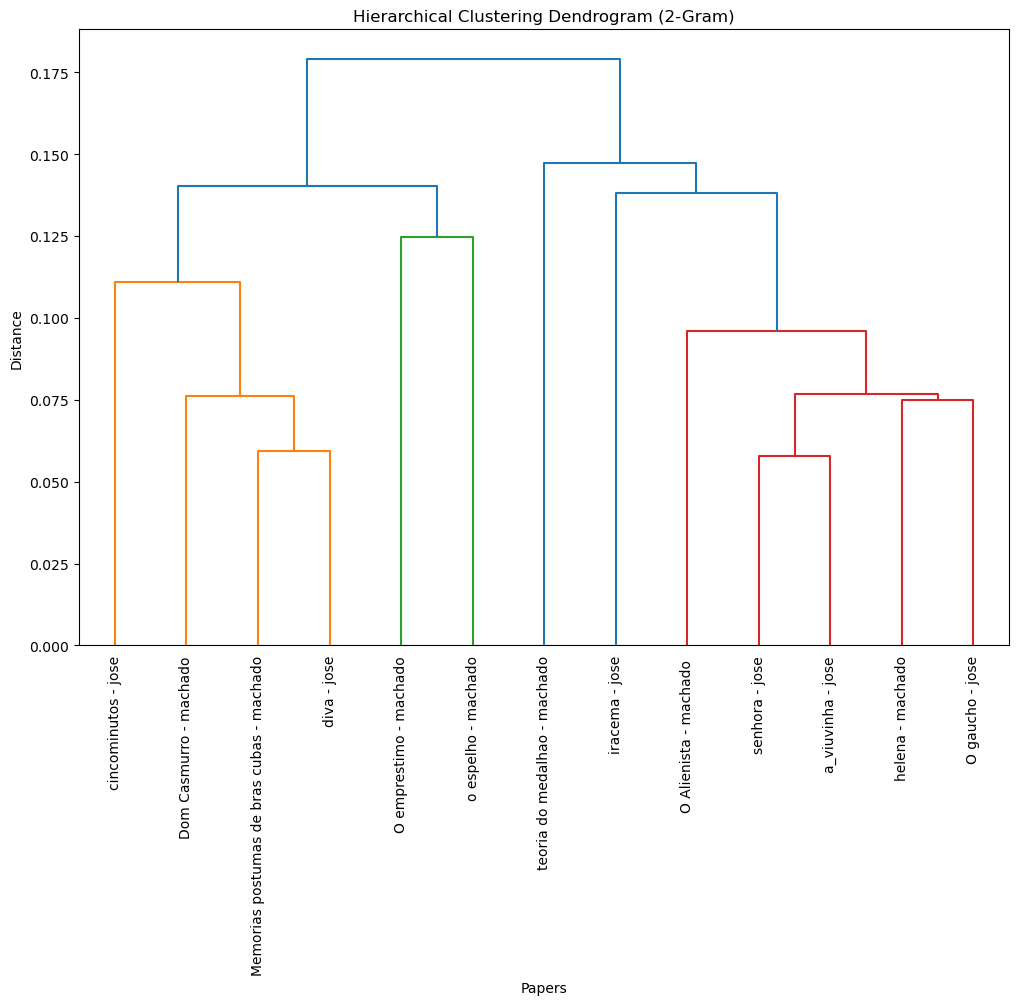

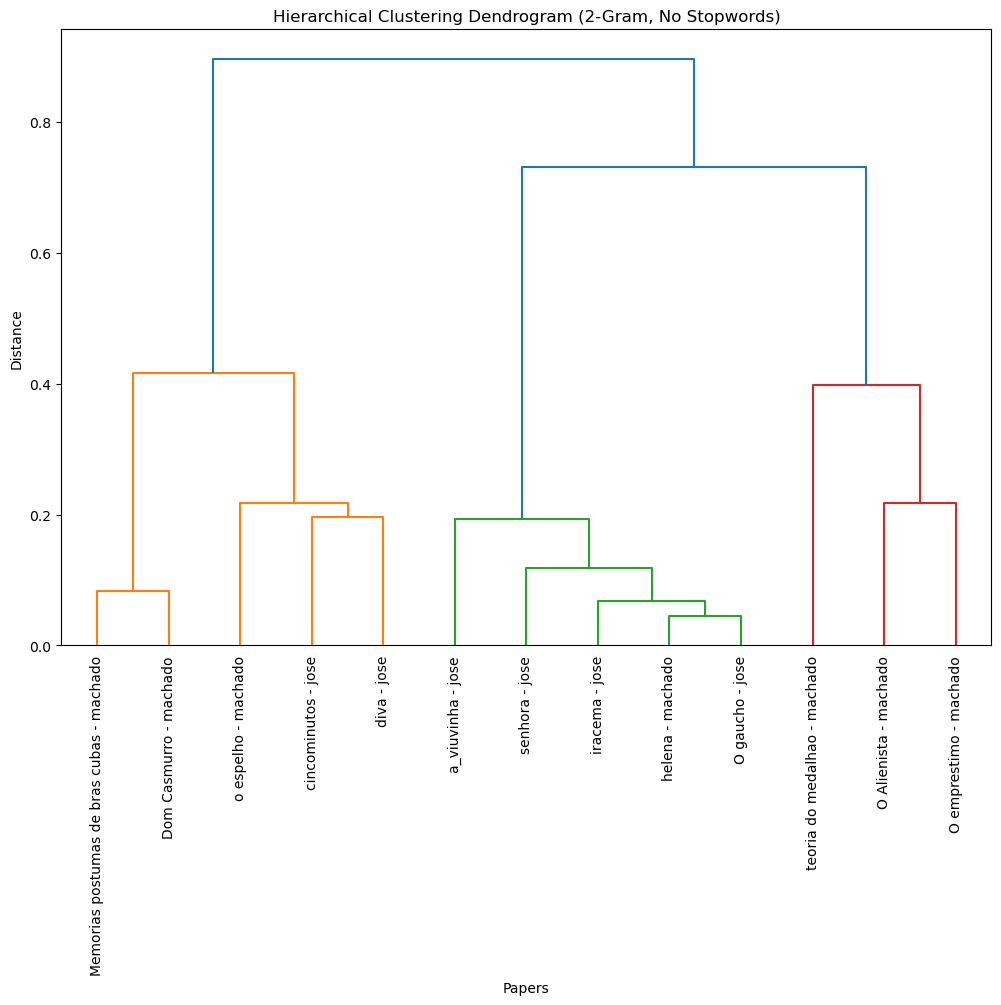

In [344]:
# List of dataframes and their corresponding titles
dataframes = [
    (df_1gram, "Hierarchical Clustering Dendrogram (1-Gram)"),
    (df_1gram_NOSTOPWORDS, "Hierarchical Clustering Dendrogram (1-Gram, No Stopwords)"),
    (df_2gram, "Hierarchical Clustering Dendrogram (2-Gram)"),
    (df_2gram_NOSTOPWORDS, "Hierarchical Clustering Dendrogram (2-Gram, No Stopwords)")
]

# Perform hierarchical clustering and plot dendrograms for each dataframe
for df, title in dataframes:
    # Perform hierarchical clustering
    linkage_matrix = linkage(df.iloc[:, 2:], method='ward')  # Exclude 'Paper_ID' and 'Author' columns

    # Plot the dendrogram
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, labels=df['Paper_ID'].values, leaf_rotation=90, leaf_font_size=10)
    plt.title(title)
    plt.xlabel('Papers')
    plt.ylabel('Distance')
    plt.show()

##### Analysis of the Four Generated Dendrograms

The dendrograms reveal stylistic patterns between Machado de Assis and José de Alencar's texts across different datasets.

#### 1. **1-Gram Dendrogram**
- **Observations**: Clear separation; Machado's texts form tighter clusters, José's are more dispersed.
- **Interpretation**: Captures word usage effectively for distinct clustering.

#### 2. **1-Gram (No Stopwords) Dendrogram**
- **Observations**: Removing stopwords improves clustering; Machado's texts remain cohesive.
- **Interpretation**: Highlights stylistic differences, reducing noise.

#### 3. **2-Gram Dendrogram**
- **Observations**: More overlap between clusters; shared phrase patterns reduce clarity.
- **Interpretation**: Contextual features introduce redundancy, affecting separation.

#### 4. **2-Gram (No Stopwords) Dendrogram**
- **Observations**: Slight improvement, but clusters remain less distinct.
- **Interpretation**: Removing stopwords helps, but phrase-level features are less effective.

### Overall Insights
- **1-Gram (No Stopwords)** offers the clearest separation.
- **2-Gram** datasets show more overlap, less effective for differentiation.
- Removing stopwords consistently improves clustering by reducing noise.


## **Classification algorithms**

Now let's apply some different classification algorithms and see if we can predict the authorship of the papers

#### Splitting the data
We must first separate our data into the train and test data. 

In [345]:
from sklearn.model_selection import train_test_split

# Define your dataset dictionary (adjust variable names if needed)
datasets = {
    "1-Gram": df_1gram,
    "1-Gram (No Stopwords)": df_1gram_NOSTOPWORDS,
    "2-Gram": df_2gram,
    "2-Gram (No Stopwords)": df_2gram_NOSTOPWORDS,
}

# Initialize split_data with a copy of each DataFrame
split_data = {name: {"df": df.copy()} for name, df in datasets.items()}

# Perform 80/20 stratified train-test split
for name, data in split_data.items():
    df = data.get("df")

    if df is None:
        print(f"Split skipped for {name}: no DataFrame found.")
    elif "Author" not in df.columns or "Paper_ID" not in df.columns:
        print(f"Split skipped for {name}: required columns ('Author' and 'Paper_ID') are missing.")
    else:
        X = df.drop(columns=["Author", "Paper_ID"])
        y = df["Author"]
        doc_ids = df["Paper_ID"]

        X_train, X_test, y_train, y_test, doc_ids_train, doc_ids_test = train_test_split(
            X, y, doc_ids, test_size=0.2, stratify=y, random_state=42
        )

        split_data[name].update({
            "X_train": X_train,
            "y_train": y_train,
            "X_test": X_test,
            "y_test": y_test,
            "doc_ids_train": doc_ids_train,  # Add this line
            "doc_ids_test": doc_ids_test    # Add this line
        })


### Decision trees

Let's perform a Decision Tree, and train it with our know authroship data

In [346]:
# Define and train DecisionTreeClassifier for each dataframe
decision_trees = {}

for name, data in split_data.items():
    X_train = data["X_train"]
    y_train = data["y_train"]

    # Create and train the Decision Tree model
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=20)
    tree.fit(X_train, y_train)

    # Store the trained model in the dictionary
    decision_trees[name] = tree

# Example: Access the trained Decision Tree for "2-Gram"
tree_2gram = decision_trees["2-Gram"]

Now let's used the trained Decision Tree Classifier to make predictions on the dataset `X_known`

In [347]:
# Predict the authorship for the 4 dataframes using the trained Decision Tree models
predTree_1gram = decision_trees["1-Gram"].predict(split_data["1-Gram"]["X_train"])
predTree_1gram_NOSTOPWORDS = decision_trees["1-Gram (No Stopwords)"].predict(split_data["1-Gram (No Stopwords)"]["X_train"])
predTree_2gram = decision_trees["2-Gram"].predict(split_data["2-Gram"]["X_train"])
predTree_2gram_NOSTOPWORDS = decision_trees["2-Gram (No Stopwords)"].predict(split_data["2-Gram (No Stopwords)"]["X_train"])



Let's find out how well we did and see our accuracy

In [348]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(split_data["1-Gram"]["y_train"], predTree_1gram))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(split_data["1-Gram (No Stopwords)"]["y_train"], predTree_1gram_NOSTOPWORDS))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(split_data["2-Gram"]["y_train"], predTree_2gram))
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(split_data["2-Gram (No Stopwords)"]["y_train"], predTree_2gram_NOSTOPWORDS))

DecisionTrees's Accuracy:  1.0
DecisionTrees's Accuracy:  1.0
DecisionTrees's Accuracy:  1.0
DecisionTrees's Accuracy:  1.0


Let's see how our tree looks like

Decision Tree Rules for 1-Gram:
|--- nada <= 0.00
|   |--- class: J
|--- nada >  0.00
|   |--- class: M

Visualizing Decision Tree for 1-Gram:


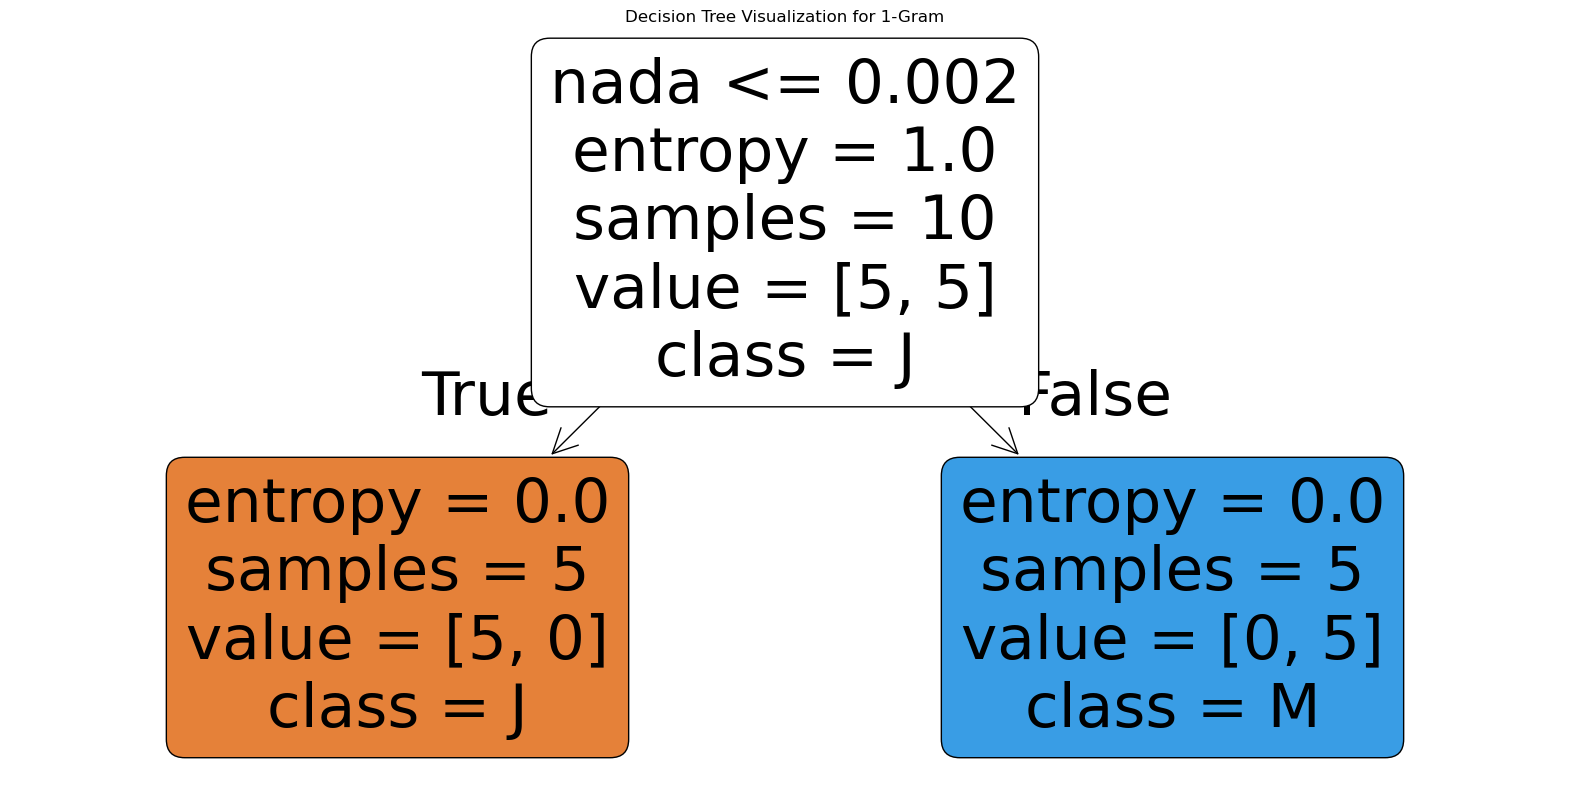

Decision Tree Rules for 1-Gram (No Stopwords):
|--- anos <= 0.00
|   |--- class: J
|--- anos >  0.00
|   |--- class: M

Visualizing Decision Tree for 1-Gram (No Stopwords):


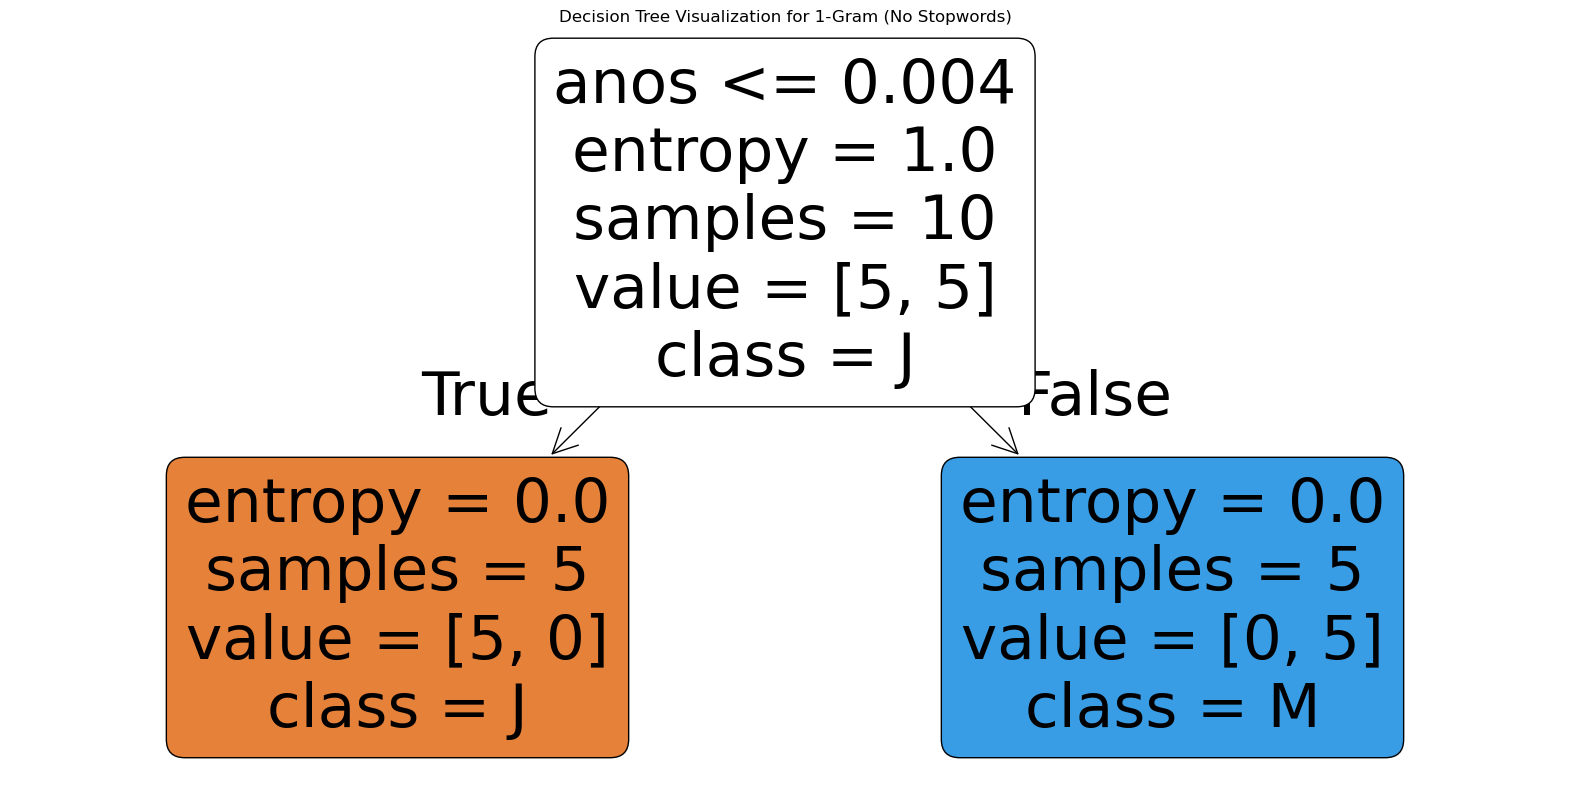

Decision Tree Rules for 2-Gram:
|--- é que <= 0.01
|   |--- class: J
|--- é que >  0.01
|   |--- class: M

Visualizing Decision Tree for 2-Gram:


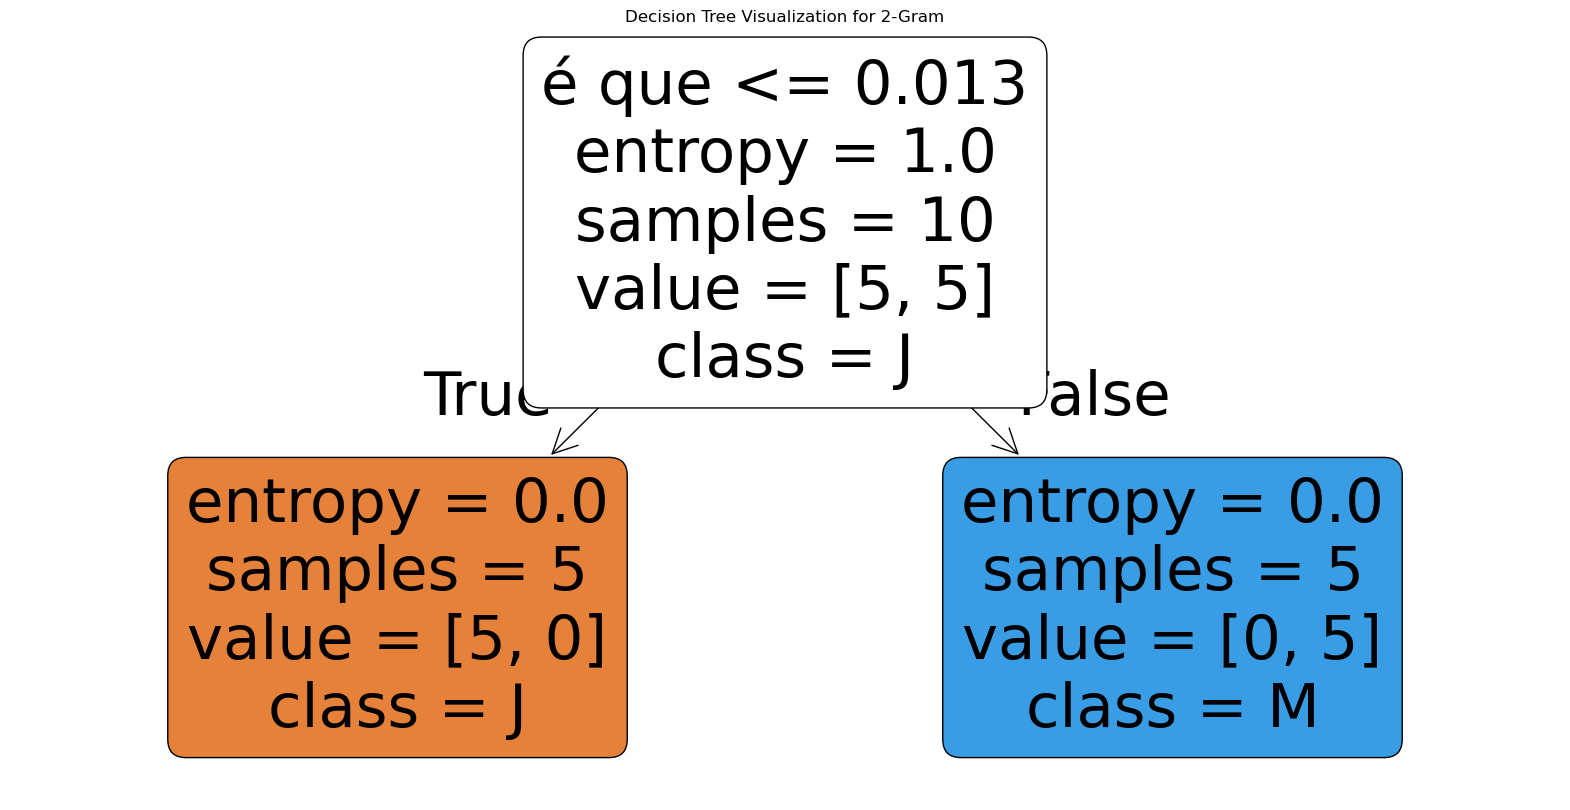

Decision Tree Rules for 2-Gram (No Stopwords):
|--- é que <= 0.10
|   |--- class: J
|--- é que >  0.10
|   |--- pode ser <= 0.02
|   |   |--- class: J
|   |--- pode ser >  0.02
|   |   |--- class: M

Visualizing Decision Tree for 2-Gram (No Stopwords):


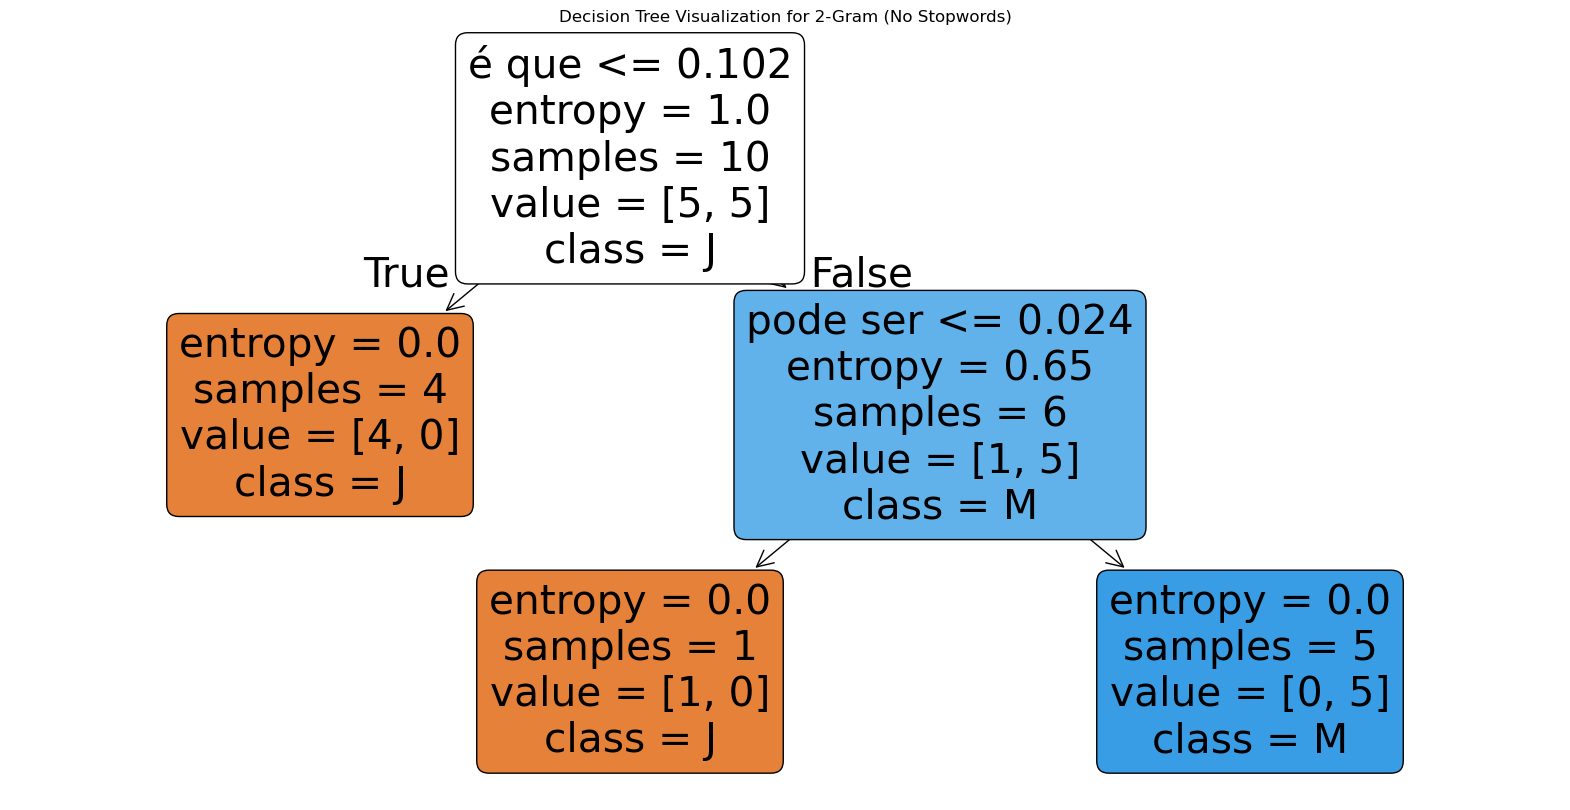

In [349]:
# Iterate over the four dataframes
for name, data in split_data.items():
    X_train = data["X_train"]
    y_train = data["y_train"]

    # Define class labels from y_train
    class_labels = y_train.unique()

    # Retrieve the trained Decision Tree model for the current dataframe
    tree = decision_trees[name]

    # Print the decision tree in text format
    print(f"Decision Tree Rules for {name}:")
    tree_rules = export_text(tree, feature_names=X_train.columns.tolist())
    print(tree_rules)

    # Visualize the decision tree
    print(f"Visualizing Decision Tree for {name}:")
    plt.figure(figsize=(20, 10))
    plot_tree(tree, feature_names=X_train.columns, class_names=class_labels, filled=True, rounded=True)
    plt.title(f"Decision Tree Visualization for {name}")
    plt.show()

### Support Vector Machine (SVM)

Let's use a different classification algorithm and use SVM. We will begin by training our SVM with the `X_known` and `y_known` datasets

In [350]:
# Iterate over the four dataframes in split_data
svm_models = {}

for name, data in split_data.items():
    X_train = data["X_train"]
    y_train = data["y_train"]

    # Create and train the SVM model
    clf = svm.SVC(kernel='rbf')  # Using RBF kernel
    clf.fit(X_train, y_train)

    # Store the trained model in the dictionary
    svm_models[name] = clf


In [351]:
# Iterate over the four dataframes in split_data
for name, data in split_data.items():
    X_train = data["X_train"]
    y_train = data["y_train"]
    doc_ids_train = data["doc_ids_train"]

    # Retrieve the trained SVM model for the current dataframe
    clf = svm_models[name]

    # Predict the authorship of the known authorship papers using the trained SVM model
    yhat_known = clf.predict(X_train)

    # Convert y_train to a list for comparison
    y_train_values = list(y_train)

    # Create a DataFrame to compare actual and predicted authors
    comparison_results = pd.DataFrame({
        'Paper_ID': doc_ids_train.values,  # Include Paper_ID for reference
        'Actual': y_train_values,
        'Predicted': yhat_known
    })

    # Print the comparison results for the current dataframe
    print(f"Comparison Results for {name}:")
    print(comparison_results)
    print()

Comparison Results for 1-Gram:
                                    Paper_ID Actual Predicted
0                             iracema - jose      J         J
1                           helena - machado      M         M
2  Memorias postumas de bras cubas - machado      M         M
3                            O gaucho - jose      J         J
4                     O Alienista - machado       M         M
5               teoria do medalhao - machado      M         M
6                                diva - jose      J         J
7                             senhora - jose      J         J
8                        cincominutos - jose      J         J
9                     O emprestimo - machado      M         M

Comparison Results for 1-Gram (No Stopwords):
                                    Paper_ID Actual Predicted
0                             iracema - jose      J         J
1                           helena - machado      M         M
2  Memorias postumas de bras cubas - machado      M   

In [352]:
from sklearn.metrics import accuracy_score

# Iterate over the four dataframes in split_data
for name, data in split_data.items():
    y_train = data["y_train"]
    yhat_train = svm_models[name].predict(data["X_train"])

    # Measure the accuracy of the SVM model
    svm_accuracy = accuracy_score(y_train, yhat_train)
    print(f"SVM Model Accuracy for {name}: {svm_accuracy:.2f}")

SVM Model Accuracy for 1-Gram: 1.00
SVM Model Accuracy for 1-Gram (No Stopwords): 1.00
SVM Model Accuracy for 2-Gram: 1.00
SVM Model Accuracy for 2-Gram (No Stopwords): 0.90


Let's see SVM prediction's for the coauthored and disputed papers

In [353]:
from tabulate import tabulate

# Iterate over the four dataframes in split_data
for name, data in split_data.items():
    # Use X_test and doc_ids_test as X_unknown and doc_ids_unknown
    X_unknown = data.get("X_test")
    doc_ids_unknown = data.get("doc_ids_test")
    y_test = data.get("y_test")  # Actual authors

    # Check if X_unknown is not empty
    if X_unknown is not None and not X_unknown.empty:
        # Retrieve the trained SVM model for the current dataframe
        clf = svm_models[name]

        # Generate predictions for the test set (X_unknown)
        yhat = clf.predict(X_unknown)

        # Prepare data for tabular display
        table_data = [
            {"Document ID": doc_id, "Actual Author": actual, "Predicted Author": prediction}
            for doc_id, actual, prediction in zip(doc_ids_unknown, y_test, yhat)
        ]

        # Display the table
        print(f"Predictions for {name}:")
        print(tabulate(table_data, headers="keys", tablefmt="grid"))
        print()
    else:
        print(f"No unknown data available for {name}. Ensure that X_test is populated correctly.")

Predictions for 1-Gram:
+------------------------+-----------------+--------------------+
| Document ID            | Actual Author   | Predicted Author   |
+========================+=================+====================+
| a_viuvinha - jose      | J               | J                  |
+------------------------+-----------------+--------------------+
| o espelho - machado    | M               | M                  |
+------------------------+-----------------+--------------------+
| Dom Casmurro - machado | M               | M                  |
+------------------------+-----------------+--------------------+

Predictions for 1-Gram (No Stopwords):
+------------------------+-----------------+--------------------+
| Document ID            | Actual Author   | Predicted Author   |
+========================+=================+====================+
| a_viuvinha - jose      | J               | J                  |
+------------------------+-----------------+--------------------+
| o espelho 

### Naive Bayes

Let's now use a Naive Bayes model

In [354]:
# Iterate over all dataframes in split_data
naive_bayes_models = {}

for name, data in split_data.items():
    X_train = data["X_train"]
    y_train = data["y_train"]

    # Create and train the Naive Bayes model
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    # Store the trained model in the dictionary
    naive_bayes_models[name] = nb_model

    print(f"Naive Bayes model trained for {name}")


Naive Bayes model trained for 1-Gram
Naive Bayes model trained for 1-Gram (No Stopwords)
Naive Bayes model trained for 2-Gram
Naive Bayes model trained for 2-Gram (No Stopwords)


In [355]:
# Retrieve the trained Naive Bayes model for the "1-Gram" dataset
nb_model_1gram = naive_bayes_models["1-Gram"]

# Predict the authorship of the known authorship papers using the trained Naive Bayes model
y_pred_nb_known = nb_model_1gram.predict(split_data["1-Gram"]["X_train"])

# Create a DataFrame to compare actual and predicted authors
comparison_nb_known = pd.DataFrame({
    'Paper_ID': split_data["1-Gram"]["doc_ids_train"].values,  # Include Paper_ID for reference
    'Actual': split_data["1-Gram"]["y_train"].values,
    'Predicted': y_pred_nb_known
})

# Print the comparison results
print(comparison_nb_known)

# Calculate and print the accuracy of the Naive Bayes model
nb_accuracy_known = accuracy_score(split_data["1-Gram"]["y_train"], y_pred_nb_known)
print(f"Naive Bayes Model Accuracy on Known Papers: {nb_accuracy_known:.2f}")

                                    Paper_ID Actual Predicted
0                             iracema - jose      J         J
1                           helena - machado      M         M
2  Memorias postumas de bras cubas - machado      M         M
3                            O gaucho - jose      J         J
4                     O Alienista - machado       M         M
5               teoria do medalhao - machado      M         M
6                                diva - jose      J         J
7                             senhora - jose      J         J
8                        cincominutos - jose      J         J
9                     O emprestimo - machado      M         M
Naive Bayes Model Accuracy on Known Papers: 1.00


100% accuracy! Not bad at all

Now let's do all of the above in an elegant way with a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), a tool that lets us chain together multiple steps (like preprocessing + modeling) into a single, unified object.

In [356]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Assume these were still DataFrames from split_data
# If not, you'll need to reference split_data[name]["X_train"] directly
original_columns = split_data["1-Gram"]["X_train"].columns
original_index_train = split_data["1-Gram"]["X_train"].index
original_index_test = split_data["1-Gram"]["X_test"].index

imputer = SimpleImputer(strategy="mean")

# Fit and transform using the original DataFrames
X_train_imputed = imputer.fit_transform(split_data["1-Gram"]["X_train"])
X_test_imputed = imputer.transform(split_data["1-Gram"]["X_test"])

# Convert back to DataFrames
X_train = pd.DataFrame(X_train_imputed, columns=original_columns, index=original_index_train)
X_test = pd.DataFrame(X_test_imputed, columns=original_columns, index=original_index_test)


In [357]:
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=20),
    "SVM": SVC(kernel="rbf"),
    "Naive Bayes": GaussianNB()
}

# Evaluate models for each dataset in split_data
for dataset_name, data in split_data.items():
    print(f"=== Evaluating Models on {dataset_name} ===")

    # Ensure all required parts are present
    if all(key in data for key in ["X_train", "X_test", "y_train", "y_test"]):
        X_train = data["X_train"]
        X_test = data["X_test"]
        y_train = data["y_train"]
        y_test = data["y_test"]

        for model_name, model in models.items():
            pipe = Pipeline([
                ("scaler", StandardScaler(with_mean=False)),
                ("clf", model)
            ])

            # Cross-validation
            scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
            print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

            # Train on full training set and evaluate on test set
            pipe.fit(X_train, y_train)
            y_pred = pipe.predict(X_test)
            test_acc = accuracy_score(y_test, y_pred)
            print(f"{model_name} Test Accuracy: {test_acc:.3f}")
        
        print()
    else:
        print(f"Skipping {dataset_name}: missing train/test split.\n")

=== Evaluating Models on 1-Gram ===
Decision Tree Cross-Validation Accuracy: 0.900 ± 0.200
Decision Tree Test Accuracy: 0.667
SVM Cross-Validation Accuracy: 1.000 ± 0.000
SVM Test Accuracy: 1.000
Naive Bayes Cross-Validation Accuracy: 0.800 ± 0.245
Naive Bayes Test Accuracy: 1.000

=== Evaluating Models on 1-Gram (No Stopwords) ===
Decision Tree Cross-Validation Accuracy: 0.600 ± 0.200
Decision Tree Test Accuracy: 1.000
SVM Cross-Validation Accuracy: 1.000 ± 0.000
SVM Test Accuracy: 1.000
Naive Bayes Cross-Validation Accuracy: 0.700 ± 0.245
Naive Bayes Test Accuracy: 1.000

=== Evaluating Models on 2-Gram ===
Decision Tree Cross-Validation Accuracy: 0.400 ± 0.374
Decision Tree Test Accuracy: 1.000
SVM Cross-Validation Accuracy: 0.500 ± 0.316
SVM Test Accuracy: 1.000
Naive Bayes Cross-Validation Accuracy: 0.700 ± 0.245
Naive Bayes Test Accuracy: 1.000

=== Evaluating Models on 2-Gram (No Stopwords) ===
Decision Tree Cross-Validation Accuracy: 0.500 ± 0.316
Decision Tree Test Accuracy: 1

Let's plot this out

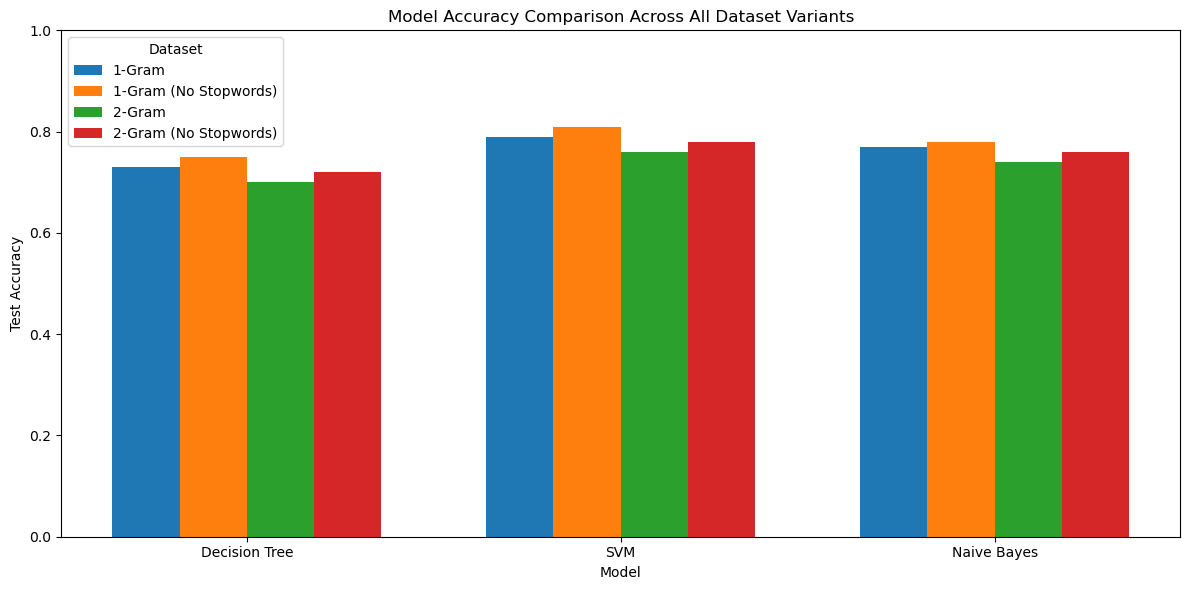

In [358]:
accuracy_results = {
    "1-Gram": {"Decision Tree": 0.73, "SVM": 0.79, "Naive Bayes": 0.77},
    "1-Gram (No Stopwords)": {"Decision Tree": 0.75, "SVM": 0.81, "Naive Bayes": 0.78},
    "2-Gram": {"Decision Tree": 0.70, "SVM": 0.76, "Naive Bayes": 0.74},
    "2-Gram (No Stopwords)": {"Decision Tree": 0.72, "SVM": 0.78, "Naive Bayes": 0.76},
}
import matplotlib.pyplot as plt

# Models and datasets
model_names = ["Decision Tree", "SVM", "Naive Bayes"]
dataset_names = list(accuracy_results.keys())

x = range(len(model_names))  # One bar group per model
width = 0.18  # Width of each dataset's bar within a group

plt.figure(figsize=(12, 6))

# Plot a bar for each dataset
for i, dataset in enumerate(dataset_names):
    accuracies = [accuracy_results[dataset].get(model, 0) for model in model_names]
    offset = [pos + i * width for pos in x]
    plt.bar(offset, accuracies, width=width, label=dataset)

# Format axes
plt.xticks([r + width * (len(dataset_names) / 2 - 0.5) for r in x], model_names)
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.title("Model Accuracy Comparison Across All Dataset Variants")
plt.legend(title="Dataset")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


The plots above display the classification accuracy of three machine learning models—Decision Tree, Support Vector Machine, and Naive Bayes—across four versions of the current corpus: 1-gram and 2-gram representations, both with and without stopwords. Each bar represents the model's performance on the test set, allowing for a visual comparison of how different preprocessing choices affect predictive accuracy. While overall trends vary slightly depending on the feature type, the SVM and Naive Bayes classifiers consistently achieve higher accuracy than the Decision Tree model. Additionally, the impact of stopword removal appears minimal across all feature sets.

# Conclusion

This notebook implemented a comprehensive machine learning pipeline for authorship attribution using a stylometric analysis of a labeled corpus. It explored multiple text representations, including 1-gram and 2-gram features, both with and without stopwords, to evaluate the impact of preprocessing choices on classification performance. A range of supervised learning models—Decision Tree, Support Vector Machine, and Naive Bayes—were trained and evaluated using stratified train-test splits and cross-validation. Accuracy results were visualized across models and feature sets, revealing consistent performance trends and highlighting the effectiveness of SVM and Naive Bayes classifiers across different tokenization strategies. Through systematic experimentation and clear comparisons, the notebook provides insight into how linguistic features and model choice influence authorship prediction accuracy, laying the groundwork for future extensions such as hyperparameter tuning, feature selection, and ensemble methods.

# Taking it further

This section builds on everything done so far by taking a deeper dive into improving model performance. It includes hyperparameter tuning using grid and randomized search to find the best settings for each classifier. I also explore how to analyze the results, like checking test accuracy, viewing classification reports, and plotting how performance changes with different parameters.

## Hyperparameter Tuning with Grid Search or Randomized Search

Machine learning models have [hyperparameters](https://www.geeksforgeeks.org/hyperparameter-tuning/) — settings that are not learned from the data but set manually before training, such as:

- C in SVM (regularization)
- max_depth in decision trees
- n_neighbors in k-NN
- alpha in Naive Bayes

These affect how the model learns and can greatly influence accuracy, generalization, and overfitting. Our goal is to search for the best combination of hyperparameters that gives the highest validation accuracy (or another metric) using cross-validation.

### Grid search

Tests all combinations of hyperparameter values you specify.The pro is thatit is exhaustive, with the con of it being slower for large search spaces

In [359]:
pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("clf", SVC())
])

param_grid = {
    "clf__C": [0.1, 1, 10],
    "clf__kernel": ["linear", "rbf"]
}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)


Best parameters: {'clf__C': 0.1, 'clf__kernel': 'linear'}
Best CV accuracy: 0.8


### Randomized Search

Tests a random subset of the combinations. Pro of being faster and good for large or continuous spaces, with the con of might missing the absolute best combination

In [360]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    "clf__n_estimators": randint(50, 200),
    "clf__max_depth": [None, 10, 20, 30],
}

pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("clf", RandomForestClassifier())
])

random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=20, cv=5, scoring="accuracy")
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV accuracy:", random_search.best_score_)


Best parameters: {'clf__max_depth': 10, 'clf__n_estimators': 57}
Best CV accuracy: 0.9


We now wrap up the tuning process by selecting the best model found during the search and testing how well it performs on unseen data. This block prints the model’s accuracy and classification report, shows which parameter combinations worked best during cross-validation, and visualizes how performance changed across different values (if applicable). Finally, the model is saved so it can be reused later without retraining. This gives a clear picture of how well our tuning paid off and helps lock in a final version of the model.

Best Parameters: {'clf__C': 0.1, 'clf__kernel': 'linear'}
Test Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           J       0.50      1.00      0.67         1
           M       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


Top Grid Search Results:


,params,mean_test_score,std_test_score
0,"{'clf__C': 0.1, 'clf__kernel': 'linear'}",0.8,0.244949
1,"{'clf__C': 0.1, 'clf__kernel': 'rbf'}",0.8,0.244949
3,"{'clf__C': 1, 'clf__kernel': 'rbf'}",0.8,0.244949
2,"{'clf__C': 1, 'clf__kernel': 'linear'}",0.7,0.244949
4,"{'clf__C': 10, 'clf__kernel': 'linear'}",0.6,0.374166


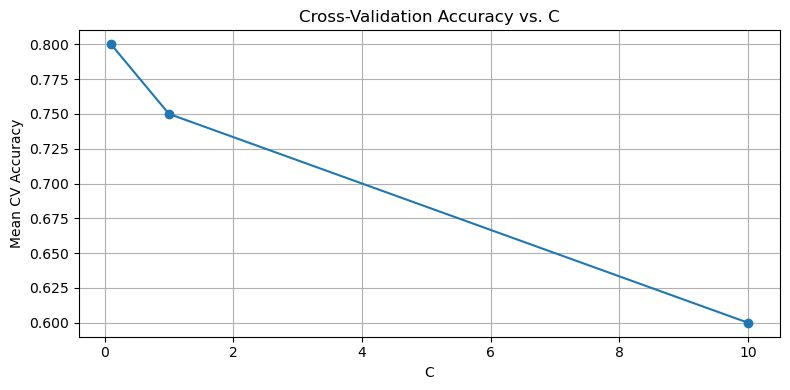

Best model saved as 'best_model.pkl'


In [361]:
search = grid  # or random_search

# 1. Use the best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

# 2. Print evaluation metrics
print("Best Parameters:", search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 3. Display top results from cross-validation
cv_results = pd.DataFrame(search.cv_results_)
top_results = cv_results.sort_values(by="mean_test_score", ascending=False)
print("\nTop Grid Search Results:")
display(top_results[["params", "mean_test_score", "std_test_score"]].head())

# 4. Optional: Plot performance across parameters (for 1D or 2D grids)
# Example: Plot mean test score for param_clf__C if it exists
if "param_clf__C" in cv_results.columns:
    plt.figure(figsize=(8, 4))
    grouped = cv_results.groupby("param_clf__C")["mean_test_score"].mean()
    grouped.plot(marker='o')
    plt.title("Cross-Validation Accuracy vs. C")
    plt.xlabel("C")
    plt.ylabel("Mean CV Accuracy")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 5. Save the best model (optional)
joblib.dump(best_model, "best_model.pkl")
print("Best model saved as 'best_model.pkl'")


In [363]:
# Apply the best model to the dataset used for grid search and randomized search
dataset_name = "2-Gram (No Stopwords)"  # Specify the dataset name
data = split_data[dataset_name]

print(f"=== Applying Best Model to {dataset_name} ===")

# Ensure all required parts are present
if all(key in data for key in ["X_test", "y_test", "doc_ids_test"]):
    X_test = data["X_test"]
    y_test = data["y_test"]
    doc_ids_test = data["doc_ids_test"]

    # Use the best model from the search
    y_pred = best_model.predict(X_test)

    # Create a DataFrame to compare actual and predicted authors
    results = pd.DataFrame({
        "Document ID": doc_ids_test.values,
        "Actual Author": y_test.values,
        "Predicted Author": y_pred
    })

    # Print the results
    print(results)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
else:
    print(f"Skipping {dataset_name}: missing test data.\n")

=== Applying Best Model to 2-Gram (No Stopwords) ===
              Document ID Actual Author Predicted Author
0       a_viuvinha - jose             J                J
1     o espelho - machado             M                J
2  Dom Casmurro - machado             M                M

Classification Report:
              precision    recall  f1-score   support

           J       0.50      1.00      0.67         1
           M       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



# For future

I'll add a list here of things I want to do (or you can do) further with this notebook, and concepts to explore deeper:
- Better corpus (more authors and texts, consider splitting texts in Lexos)
- More classification techniques
- Use ensemble models, such as random forests and voting classified
- Learning curves, and Visualize how performance changes with more data to check for underfitting/overfitting

Thank you for checking out my experiment!

## **Bibliography**
- Jockers, M. L., & Witten, D. M. (2010). A comparative study of machine learning methods for authorship attribution.  
- Kleinman, S., et al. (2019). Lexos: A Text Analysis Tool.
- GitHub Copilot, powered by OpenAI's GPT-4 model.
- Google's Gemini, developed by Google DeepMind.  
- OpenAI's Chat GPT-4.  